In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [125]:
train_data = pd.read_csv('train.csv')
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [126]:
train_data.shape

(891, 12)

In [127]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Observations:-> 
passengerid, name, ticket has no significance on target variable-> 
There are 3 classes in titani-> c
age has 177 and embarked has 2 and cabin has 687 missing values

In [131]:
train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [132]:
train_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [134]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [135]:
train_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [136]:
test_data = pd.read_csv('test.csv')
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [137]:
# female_survival = pd.DataFrame(train_data['Sex'=='female'],train_data['Survived'])
women = train_data[train_data['Sex'] == 'female']['Survived']
rate_women = sum(women) / len(women)
total_women = len(women)
print('total number of women in ship',total_women)
print('rate of women survived',rate_women)
survived_women = total_women * rate_women
not_survived_women = total_women - survived_women
print('survived women',survived_women)
print('not survived women',not_survived_women)

total number of women in ship 314
rate of women survived 0.7420382165605095
survived women 232.99999999999997
not survived women 81.00000000000003


In [138]:
men = train_data[train_data['Sex']=='male']['Survived']
rate_men = sum(men)/len(men)
total_men  = len(men)
print('total number of men in ship',total_men)
print('rate of men survived',rate_men)
survived_men = total_men * rate_men
not_survived_men = total_men - survived_men
print('survived men',survived_men)
print('not survived men',not_survived_men)

total number of men in ship 577
rate of men survived 0.18890814558058924
survived men 109.0
not survived men 468.0


In [139]:
import matplotlib.pyplot as plt

(array([ 28.,  23., 109., 117.,  74.,  46.,  29.,  16.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

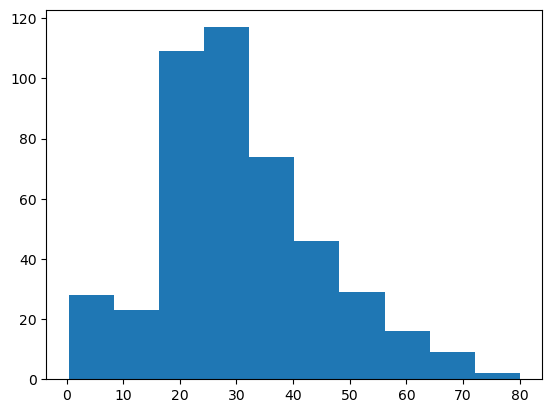

In [140]:
plt.hist(train_data[train_data['Sex']=='male']['Age'])

plt.hist(train_data[train_data['Sex']=='female']['Age'])

In [ ]:
#how many people in men between age 24 to 32 survived because they are the majority in the male

mid_age_men = train_data.loc[(train_data.Sex == 'male') & (train_data.Age >= 24.294) & (train_data.Age <= 32.252)]
total_mid_men = len(mid_age_men)
print("men in mid age",total_mid_men)

# how many of them survived

mid_age_men_survived = mid_age_men['Survived']
mid_age_men_survived_rate = sum(mid_age_men_survived)/len(mid_age_men_survived)

survived_mid_men = total_mid_men * mid_age_men_survived_rate
not_survived_mid_men = total_mid_men - survived_mid_men
print('survived mid men',survived_mid_men)
print('not survived mid men',not_survived_mid_men)

In [143]:
cat_cols=train_data.select_dtypes(include=['object']).columns
num_cols=train_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are ",cat_cols)
print("Numerical Variables are ",num_cols)

Categorical Variables are  Index(['Sex', 'Embarked'], dtype='object')
Numerical Variables are  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## EDA Exploratory Data Analysis

In [146]:
train_data

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

### Univariate Analysis
Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot,  tc.

Survived


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


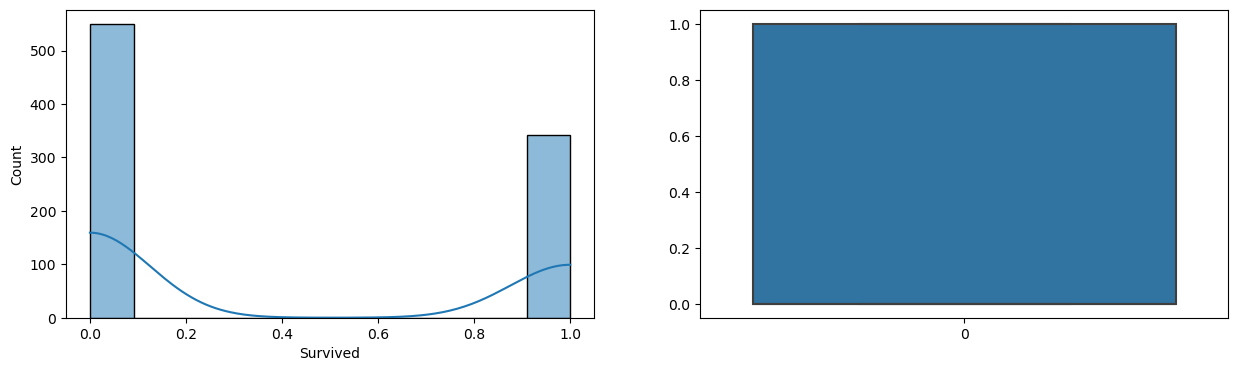

Pclass


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


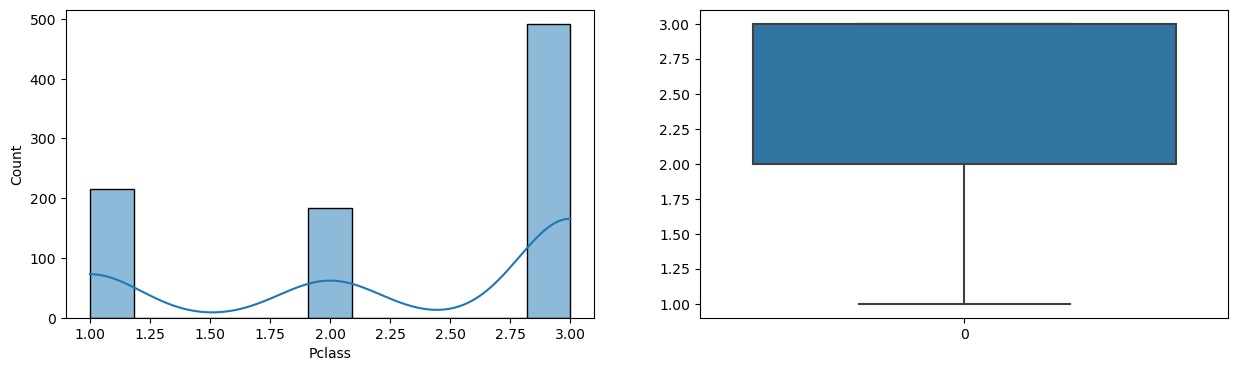

Age


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


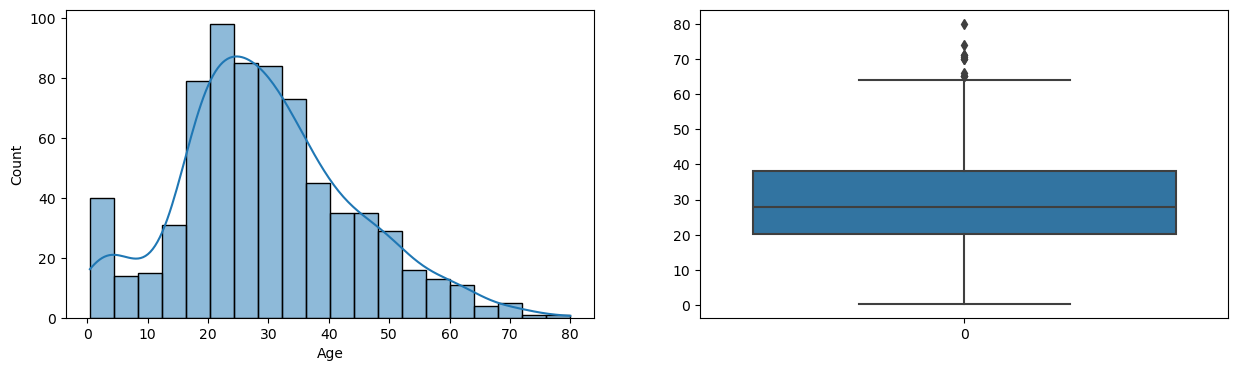

SibSp


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


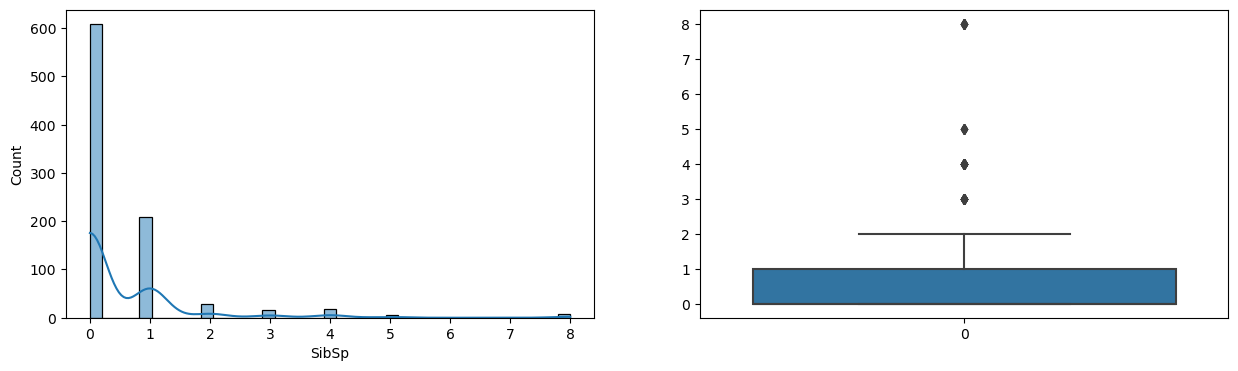

Parch


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


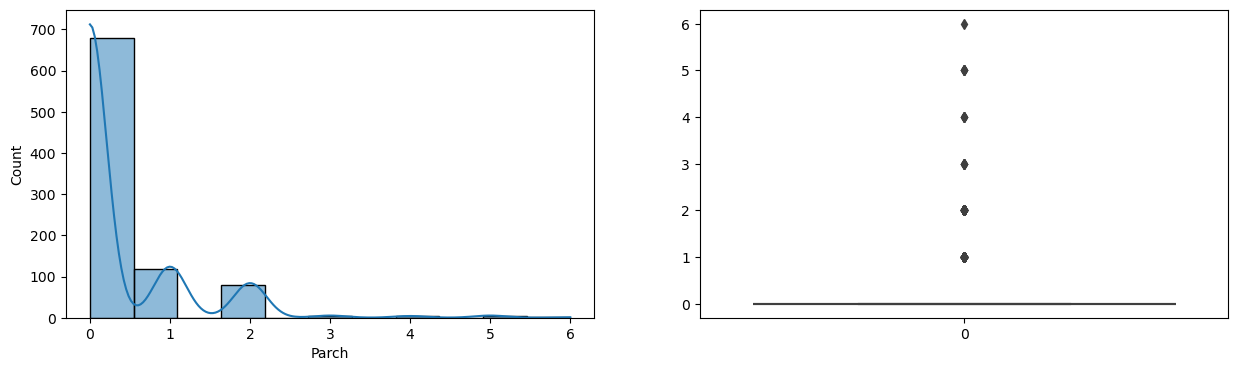

Fare


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


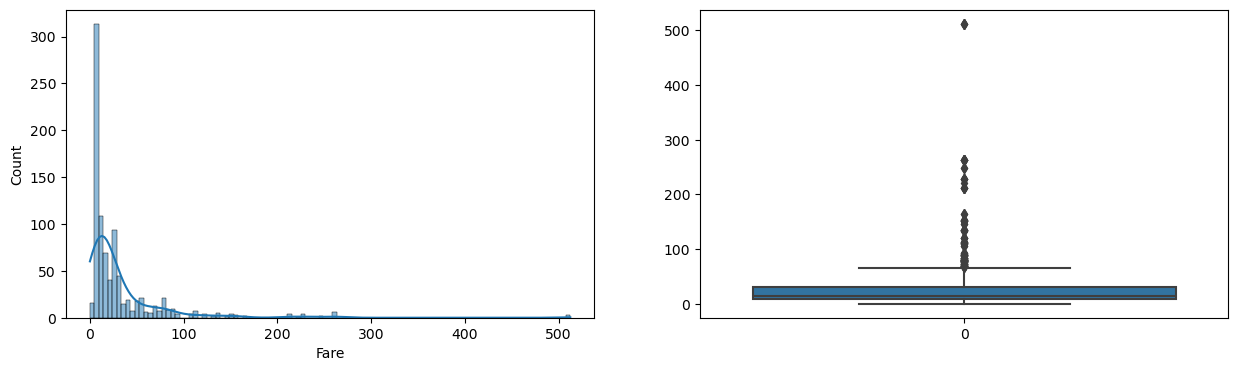

In [147]:
# brahamstra for univariate analysis for numerical columns
for col in num_cols:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

**Observations:**
* mMost people failed to survive in titani.
* most people are travelling from 3rd class.
* Most people age range vary from 20-40 and very few people are above.
* most people are travelling with no sibiling and spouse. 
* most people have no parent n children. 
* some outliers are present in fare. n fare

Sex


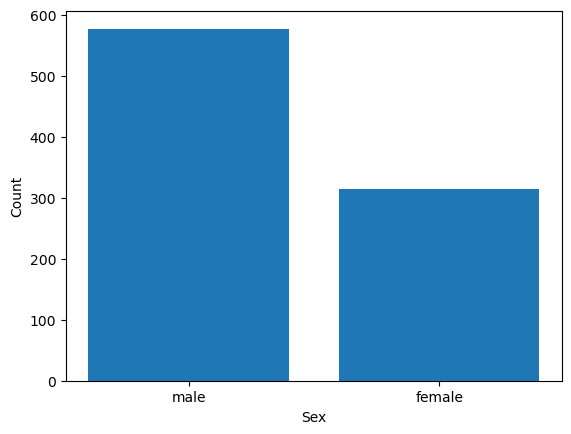

Embarked


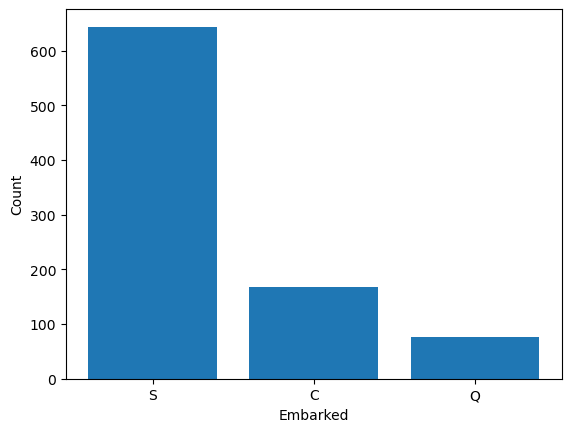

In [148]:
# For categorical columns
for col in cat_cols:
    print(col)
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### BiVariate Analysis

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

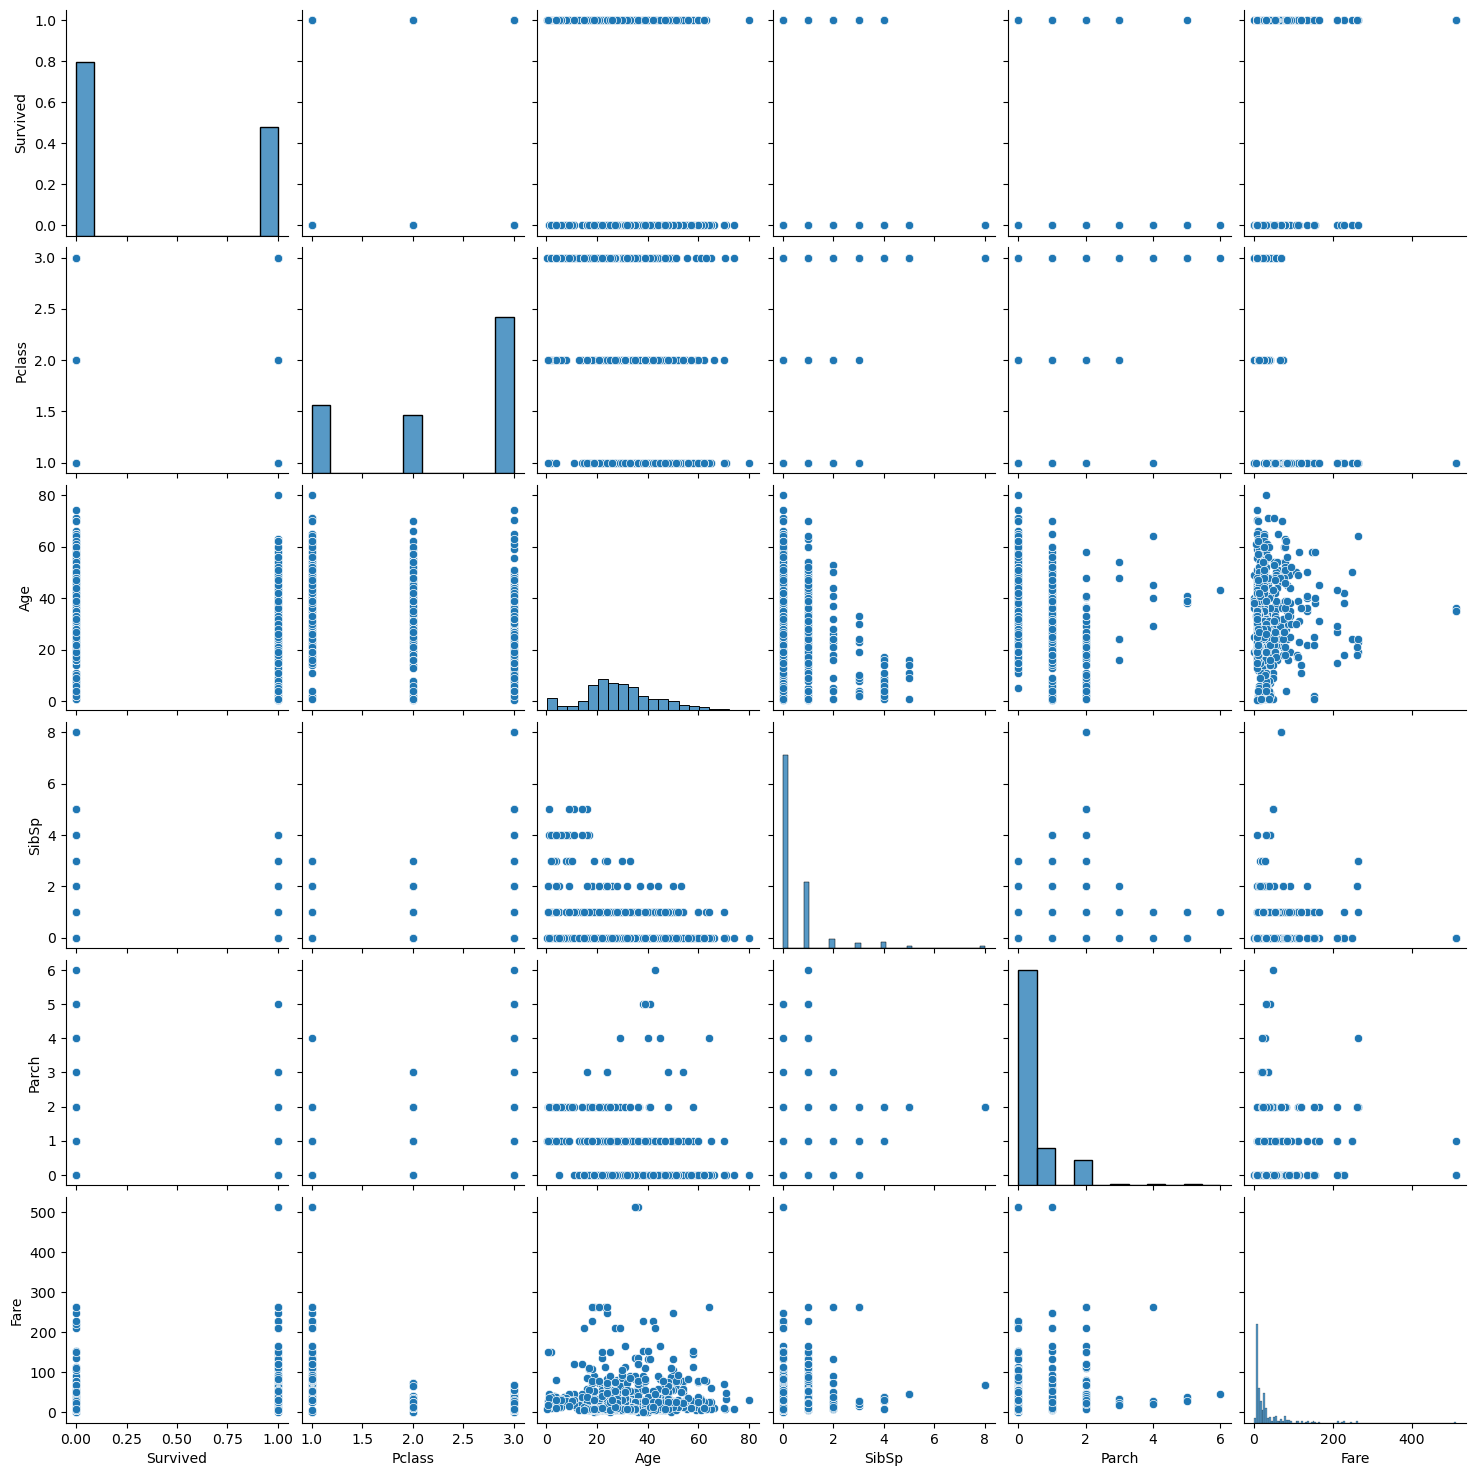

In [150]:
sns.pairplot(train_data)
plt.show()

In [178]:
# for col in df.column:
#     if col != "Survived":
#         plt.figure(figsize=(8,4))
#         sns.countplot(x=col, hue="Survived", data=df)
#         plt.xlabel(col)
#         plt.ylabel("Count")
#         plt.title(f"{col} vs Survived")
#         plt.show()

### Multivariate Analysis

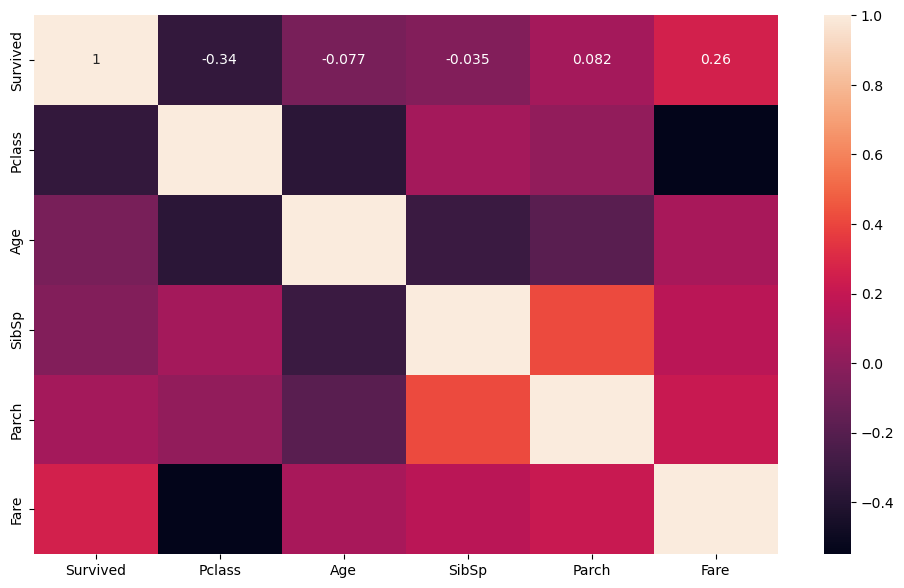

In [190]:
df1=df.select_dtypes(exclude=['object'])
plt.figure(figsize=(12, 7))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [189]:

# train_data.drop(columns=['Pclass_binned'],inplace=True)
df.drop(columns=['Cabin'],inplace=True)
print(train_data.columns)
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


### Feature Engineering

In [191]:
train_data

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [193]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [192]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**different method of feature engineering** 

In [194]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [218]:
#Missing Values Percentage
round((df.isna().sum() / len(df))*100,2)

0.0

**Drop missing value**

In [219]:
df1 = train_data.copy()
df1 = df1.dropna(axis=0)
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [221]:
print('Dataset Size With Missing Values',train_data.shape)
print('Dataset Size Without Missing Values',df1.shape)

Dataset Size With Missing Values (891, 8)
Dataset Size Without Missing Values (712, 8)


**In the above we removed null row, now we will try to remove the null column**

In [207]:
df2 = train_data.copy()
df2 = df2.drop(columns=['Age','Embarked'])
df2.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [223]:
print('Dataset Size With Missing Values',train_data.shape)
print('Dataset Size Without Missing Values',df2.shape)

Dataset Size With Missing Values (891, 8)
Dataset Size Without Missing Values (891, 6)


2. **Method Two**
   we can fill the missing columns

In [237]:
#finding the mean and filling them in the null value placec
def impute_nan_mean(df,column,mean):
    df[column+'_Mean'] = df[column].fillna(mean)
    return df
    
Age_mean = train_data.Age.mean()

mean_age_df = impute_nan_mean(train_data,'Age',Age_mean)

In [238]:
mean_age_df[mean_age_df.Age.isna()][['Age','Age_Mean']]

Age   Age_Mean
5    NaN  29.699118
17   NaN  29.699118
19   NaN  29.699118
26   NaN  29.699118
28   NaN  29.699118
..   ...        ...
859  NaN  29.699118
863  NaN  29.699118
868  NaN  29.699118
878  NaN  29.699118
888  NaN  29.699118

[177 rows x 2 columns]

**METHOD 2: Median Value Imputation**

In [240]:
def impute_nan_median(df,column,median):
    df[column+'_Median'] = df[column].fillna(median)
    return df

Age_median = train_data.Age.median()

median_age_df = impute_nan_median(train_data,'Age',Age_median)

In [241]:
median_age_df[median_age_df.Age.isna()][['Age','Age_Median']]

Age  Age_Median
5    NaN        28.0
17   NaN        28.0
19   NaN        28.0
26   NaN        28.0
28   NaN        28.0
..   ...         ...
859  NaN        28.0
863  NaN        28.0
868  NaN        28.0
878  NaN        28.0
888  NaN        28.0

[177 rows x 2 columns]

**METHOD 3: Mode Imputation**

def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = train_data.Age.mode()
df_mode = impute_nan_mode(train_data,'Age',mode_val)

In [243]:
df_mode[df_mode.Age.isna()][['Age','Age_mode']]

Age  Age_mode
5    NaN       NaN
17   NaN       NaN
19   NaN       NaN
26   NaN       NaN
28   NaN       NaN
..   ...       ...
859  NaN       NaN
863  NaN       NaN
868  NaN       NaN
878  NaN       NaN
888  NaN       NaN

[177 rows x 2 columns]

you see how most NAN values gets replaced with NAN values because the most frequent value of this numerical column is NAN. To use mode here we need to ignore all the NAN values and then apply mode on remaining values.

In [245]:
train_data[train_data.Age.notna()]['Age'].mode()[0]

24.0

In [247]:
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = train_data[train_data.Age.notna()]['Age'].mode()[0]    ## find mode of all the non missing values of Age column
df_mode = impute_nan_mode(train_data,'Age',mode_val)

In [248]:
df_mode[df_mode.Age.isna()][['Age','Age_mode']]

Age  Age_mode
5    NaN      24.0
17   NaN      24.0
19   NaN      24.0
26   NaN      24.0
28   NaN      24.0
..   ...       ...
859  NaN      24.0
863  NaN      24.0
868  NaN      24.0
878  NaN      24.0
888  NaN      24.0

[177 rows x 2 columns]

**METHOD 4: Random Sample Imputation**

In [255]:
np.random.seed(40)
### STEP 1: Generating Random Sample
sample = train_data.Age.sample().values[0]

### STEP 2: Filling nan values with random sample value
train_data['Age'+'_random_sample'] = train_data['Age'].fillna(sample)

train_data[train_data['Age'].isna()][['Age','Age_random_sample']]

Age  Age_random_sample
5    NaN               25.0
17   NaN               25.0
19   NaN               25.0
26   NaN               25.0
28   NaN               25.0
..   ...                ...
859  NaN               25.0
863  NaN               25.0
868  NaN               25.0
878  NaN               25.0
888  NaN               25.0

[177 rows x 2 columns]

## MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")